In [1]:
import pandas as pd
import main

In [2]:
real_top = pd.read_csv('real_data_test\\top_df.csv', delimiter=';')
real_top = real_top.rename(columns={'WELL_NAME': 'WELL_NAME_UWI'})
del real_top['X']
del real_top['Y']
real_top['WELL_NAME_UWI'] = real_top['WELL_NAME_UWI'].astype('str')
real_top.head(n=2)

,WELL_NAME_UWI,DEPTH_TOP
0,100,2548.81
1,101,2556.23


In [3]:
real_bottom = pd.read_csv('real_data_test\\bottom_df.csv', delimiter=';')
real_bottom = real_bottom.rename(columns={'WELL_NAME': 'WELL_NAME_UWI'})
del real_bottom['X']
del real_bottom['Y']
real_bottom['WELL_NAME_UWI'] = real_bottom['WELL_NAME_UWI'].astype('str')
real_bottom.head(n=2)

,WELL_NAME_UWI,DEPTH_BOTTOM
0,100,2564.81
1,101,2571.71


In [4]:
# данные от организаторов
water_content_data = pd.read_csv(main.data_dir + "\\water_content.csv", delimiter=';')
water_content_data = water_content_data.rename(columns={'Скважина': main.keys_dict[main.kid_well]})
water_content_data = water_content_data.rename(columns={' Начальная обводненность ': 'WC'})
water_content_data = water_content_data.rename(columns={'Дата запуска': 'date_start'})
del water_content_data['date_start']
water_content_data = water_content_data.rename(columns={'well_name': 'WELL_NAME'})
water_content_data.head(n=5)
water_content_data['WELL_NAME'] = water_content_data['WELL_NAME'].astype('str')
water_content_data.info()
print('count wc_data = ', len(water_content_data['WELL_NAME'].value_counts()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 2 columns):
WELL_NAME    181 non-null object
WC           181 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB
count wc_data =  180


In [5]:
las_out_file_name = 'AllGisParams\\fake_gis_las_all_out.csv'
global_data = pd.read_csv(las_out_file_name, delimiter=';')
global_data['WELL_NAME'] = global_data['WELL_NAME'].astype('str')
global_data['WELL_NAME_UWI'] = global_data['WELL_NAME_UWI'].astype('str')

In [6]:
param = 'GZ7'
# Загружаем данные по параметру
# las_gis_file_name = 'AllGisParams\\fake_gis_las_' + param_name_file +  '_out.csv'
# las_data = pd.read_csv(las_gis_file_name, delimiter=';', low_memory=False)
las_data = global_data[['WELL_NAME', 'WELL_NAME_UWI', 'DEPT', param]].copy()
las_data['WELL_NAME'] = las_data['WELL_NAME'].astype('str')
las_data['WELL_NAME_UWI'] = las_data['WELL_NAME_UWI'].astype('str')
las_data.head(n=5)
    
# Объединяем данные
real_data = pd.merge(water_content_data, las_data, on='WELL_NAME')
real_data = pd.merge(real_data, real_top, on='WELL_NAME_UWI')
real_data = pd.merge(real_data, real_bottom, on='WELL_NAME_UWI')
real_data_na = real_data.dropna()

In [7]:
count_val = 500
min_count_val_in_data = 10
# Преобразуем в данные для обучения
dev_path = "..\\tasks\\task 6\\data\\dev\\"
well_name_list = real_data_na['WELL_NAME_UWI'].value_counts().index.tolist()
[x_values, y_values, y_names] = main.ConvertDataToLearning(real_data_na, param, dev_path,
                                                               min_count_val_in_data, count_val)
mnozh = 1./count_val
z_values = [z*mnozh for z in range(0, count_val)]

0  of  154
20  of  154
40  of  154
60  of  154
80  of  154
100  of  154
120  of  154
140  of  154
end ConvertDataToLearning


0.01


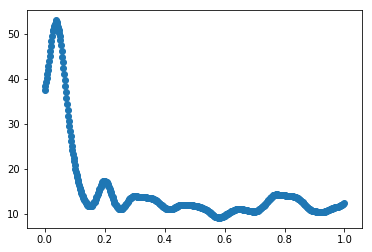

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
count = 0
plt.scatter(z_values, x_values[count])
print(y_values[count])

In [9]:
from sklearn.model_selection import train_test_split, StratifiedKFold
x_train, x_hold, y_train, y_hold = train_test_split(x_values, y_values, test_size=0.3, random_state=17)

In [10]:
save_x_train = pd.DataFrame(x_train, columns=['x' + str(z) for z in range(0, count_val)])
save_y_train = pd.DataFrame(y_train, columns=['wc'])
save_xy_train = pd.merge(save_y_train, save_x_train, left_index = True, right_index = True)

In [11]:
save_x_hold = pd.DataFrame(x_hold, columns=['x' + str(z) for z in range(0, count_val)])
save_y_hold = pd.DataFrame(y_hold, columns=['wc'])
save_xy_hold = pd.merge(save_y_hold, save_x_hold, left_index = True, right_index = True)

In [12]:
save_xy_train.to_csv('matlab_prepare/data_info_train_spectrogram.csv', sep = ',', index = False, header = False)
save_xy_hold.to_csv('matlab_prepare/data_info_hold_spectrogram.csv', sep = ',', index = False, header =False)

In [45]:
# col_names = []
col_names = ['wc']
x_names = ['x' + str(z) for z in range(0, 129)]
col_names.extend(x_names)
spectr_train = pd.read_csv("matlab_prepare/features_spectrogram_train.csv", delimiter=',', names=col_names)
spectr_hold = pd.read_csv("matlab_prepare/features_spectrogram_hold.csv", delimiter=',', names=col_names)
spectr_hold.head(n=2)

,wc,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128
0,0.24,0.22449,0.22621,0.23155,0.24122,0.25660,0.28028,0.31724,0.37730,0.47779,...,0.18469,0.18043,0.18114,0.19031,0.52792,0.18133,0.17772,0.17793,0.18264,1.3969
1,0.37,0.22811,0.22913,0.23231,0.23796,0.24675,0.25988,0.27963,0.32713,0.43181,...,0.21278,0.20832,0.20740,0.21260,0.95933,0.23811,0.21938,0.21400,0.21031,1.1332


In [46]:
y_train = spectr_train['wc'].values.tolist()
x_train = spectr_train[x_names].values.tolist() 
y_hold = spectr_hold['wc'].values.tolist()
x_hold = spectr_hold[x_names].values.tolist()

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

forest_reg =  RandomForestRegressor(n_estimators=10 ,
                           oob_score=True,
                           random_state=17)

from sklearn.model_selection import GridSearchCV, cross_val_score
forest_params = { 
    'max_depth': [1, 10, 20, 40, 60],
    'n_estimators': [1, 10, 30, 50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2']
}

print('Start', param, ' learning')
forest_grid = GridSearchCV(forest_reg, forest_params, cv=5, n_jobs=-1, verbose=True)
value_fit = forest_grid.fit(x_train, y_train) 
y_predict = forest_grid.predict(x_hold)

D:\libs\Anaconda\3.3\envs\aind\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Start GZ7  learning
Fitting 5 folds for each of 105 candidates, totalling 525 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 525 out of 525 | elapsed:   59.5s finished


In [48]:
data_well_for_analize = pd.DataFrame({'y_hold':y_hold, 'y_predict':y_predict})
data_well_for_analize.to_csv('AllGisParams/result_spectrogram.csv',index=False, sep = ';')

In [49]:
value_fit

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=True, random_state=17,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 10, 20, 40, 60], 'n_estimators': [1, 10, 30, 50, 100, 200, 500], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)